Wiktor Pilarczyk nr indeksu: 308533

Ustawianie precyzji obliczeń

In [12]:
setprecision(64)
using Plots

ArgumentError: ArgumentError: Package Polynomials not found in current path:
- Run `import Pkg; Pkg.add("Polynomials")` to install the Polynomials package.


# Obliczanie pochodnej wielomianu

Na podstawie pierwszego algorytmu możemy zauważyć, że 

$$P'_{k}(x) = a_{k}P_{k-1}(x) + (a_{k}x - b_{k})P'_{k-1}(x) - c_{k}P'_{k-2}(x)$$

Na podstawiej powyższego wzoru funckja Clen1(a,b,c,w,x) oblicza pochodną w punkcie x.

In [13]:
function Clen1(a,b,c,w,x)
    n = length(w)
    wyn = Pdy = BigFloat(0)
    Py = BigFloat(a[1])
    Px = (BigFloat(a[2]) * BigFloat(x) - BigFloat(b[2])) * BigFloat(Py)
    Pdx = BigFloat(a[2]) * BigFloat(Py)
    for k in 2:n-1
        P = (BigFloat(a[k+1]) * BigFloat(x) - BigFloat(b[k+1])) * BigFloat(Px) - BigFloat(c[k+1]) * BigFloat(Py)
        Pd = BigFloat(a[k+1]) * BigFloat(Px) + (BigFloat(a[k+1]) * BigFloat(x) - BigFloat(b[k+1])) * BigFloat(Pdx) - BigFloat(c[k+1]) * BigFloat(Pdy)
        wyn += BigFloat(w[k]) * BigFloat(Pdx)
        Py = BigFloat(Px)
        Pdy = BigFloat(Pdx)
        Px = BigFloat(P)
        Pdx = BigFloat(Pd)
    end
    return BigFloat(wyn) + BigFloat(w[n]) * BigFloat(Pdx)
end

Clen1 (generic function with 1 method)

Podobnie dla drugiego algorytmu:

$$B'_{k}(x) = a_{k+1}B_{k+1}(x) + (a_{k+1}x - b_{k+1})B'_{k+1}(x) - c_{k+2}B'_{k+2}(x)$$

Funkcja Clen2(a,b,c,w,x) oblicza pochodną wielomianu w punkcie x.

In [14]:
function Clen2(a,b,c,w,x)
    n = length(w)
    Bdy = BigFloat(0)
    By = BigFloat(w[n])
    Bx = BigFloat(w[n-1]) + (BigFloat(a[n]) * BigFloat(x) - BigFloat(b[n])) * BigFloat(By)
    Bdx = BigFloat(a[n]) * BigFloat(By)
    for k in n-2:-1:1
        B = BigFloat(w[k]) + (BigFloat(a[k+1]) * BigFloat(x) + BigFloat(b[k+1])) * BigFloat(Bx) - BigFloat(c[k+2]) * BigFloat(By)
        Bd = BigFloat(a[k+1]) * BigFloat(Bx) + (BigFloat(a[k+1]) * BigFloat(x) + BigFloat(b[k+1])) * BigFloat(Bdx) - BigFloat(c[k+2]) * BigFloat(Bdy)
        By = BigFloat(Bx)
        Bdy = BigFloat(Bdx)
        Bx = BigFloat(B)
        Bdx = BigFloat(Bd)
    end
    return BigFloat(a[1])*BigFloat(Bdx)
end

Clen2 (generic function with 1 method)

# Przykłady:
## Wielomiany Czebyszewa
Korzystając z postaci trygonometrycznej dla wielomianów Czebyszewa wyliczamy wzór na pochodna wielomianu:

$$T'_{k}(x) = -\frac{k \sin{(k \arccos{x})}}{\sqrt{1 - x^2}} \space dla \space |x| < 1 $$
$$T'_{k}(x) = \frac{k \sinh{(k \space arccosh\space x)}}{\sqrt{x^2 - 1}} \space dla \space x > 1 $$
$$T'_{k}(x) = \frac{(-1)^{k+1}k \sinh{(k \space arccosh\space (-x))}}{\sqrt{x^2 - 1}} \space dla \space x < -1 $$

Funkcja Czeb(k,x) oblicza pochodną k-tego wielomianu Czebyszewa w punkcie x (pomijamy x = 1, aby nie dzielić przez 0).

In [15]:
function Czeb(k,x)
    if x == 1 || x == -1
        return NAN
    end
    if(x > 1)
        pierw = BigFloat(sqrt(BigFloat(x) * BigFloat(x) - 1))
        return (BigFloat(k) * BigFloat(sinh(BigFloat(k) * BigFloat(acosh(BigFloat(x)))))) / BigFloat(pierw)
    end
    if(x < -1)
        pierw = BigFloat(sqrt(BigFloat(x) * BigFloat(x) - 1))
        if k % 2 == 0
            pierw *= -1
        end
        return (BigFloat(k) * BigFloat(sinh(BigFloat(k) * BigFloat(acosh(BigFloat(-x)))))) / BigFloat(pierw)
    end
    pierw = BigFloat(1 - sqrt(BigFloat(x) * BigFloat(x)))
    return (BigFloat(k) * BigFloat(sin(BigFloat(k) * BigFloat(acos(BigFloat(x)))))) / BigFloat(pierw)
    
end

Czeb (generic function with 1 method)

Funckja blad porównuje wyniki dla liczenia pochodnej wielomianu Czebyszewa za pomocą funkcji Clen1, Clen2 oraz Czeb, gdzie Czeb będzie punktem odniesienia. Pochodna nie będzie liczona w pobliżu 1, aby nie nastąpiło dzielenie przez 0.
Dla podanych poniżej współczynników $a_{k},b_{k}$ i $c_{k}$ poniżej $P_{k}$ jest $T_{k}$-tym wielomianem Czebyszewa.
Funkcja dodaje odpowiednio do list ox, yCzeb, yClen1, yClen2 punkt na osi x, wartość funkcji Czeb w punkcie x, wartość funkcji Clen1 w punkcie x, wartość funkcji Clen2 w punkcie x.

In [16]:
a = [1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]
b = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
c = [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
start = 2
iter = 100
finish = 100000
ox = []
yCzeb = []
yClen1 = []
yClen2 = []
function blad(k,w)
    licz = 0
    sum1 = 0
    sum2 = 0
    print("Wyniki dla ")
    print(k)
    println(". wielomianu Czebyszwa:")
    for i in start:iter:finish
        wynclen1 = Clen1(a,b,c,w,i)
        wynclen2 = Clen2(a,b,c,w,i)
        wynczeb = Czeb(k,i)
        push!(ox,i)
        push!(yCzeb,wynczeb)
        push!(yClen1,wynclen1)
        push!(yClen2,wynclen2)
        print("x: ")
        print(i)
        print(" Czeb: ")
        println(wynczeb)
        print("Clen1: ")
        print(wynclen1)
        print(" BladClen1: ")
        print(wynclen1 - wynczeb)
        if(wynczeb != 0)
            licz += 1
            sum1 += abs((wynclen1 - wynczeb)/wynczeb)
            print(" BladWzgl: ")
            print(abs((wynclen1 - wynczeb)/wynczeb))
        end
        println()
        print("Clen2: ")
        print(wynclen2)
        print(" BladClen2: ")
        print(wynclen2 - wynczeb)
        if(wynczeb != 0)
            sum2 += abs((wynclen2 - wynczeb)/wynczeb)
            print(" BladWzgl: ")
            print(abs((wynclen2 - wynczeb)/wynczeb))
        end
        println()
    end
    print("Sredni błąd względny dla Clen1 wynosił: ")
    println(sum1/licz)
    print("Sredni błąd względny dla Clen2 wynosił: ")
    print(sum2/licz)
end

blad (generic function with 1 method)

In [17]:
w2 = [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
blad(2,w2)

Wyniki dla 2. wielomianu Czebyszwa:
x: 2 Czeb: 7.99999999999999999957
Clen1: 8.0 BladClen1: 4.33680868994201773603e-19 BladWzgl: 5.42101086242752217063e-20
Clen2: 8.0 BladClen2: 4.33680868994201773603e-19 BladWzgl: 5.42101086242752217063e-20
x: 102 Czeb: 408.0
Clen1: 408.0 BladClen1: 0.0 BladWzgl: 0.0
Clen2: 408.0 BladClen2: 0.0 BladWzgl: 0.0
x: 202 Czeb: 808.000000000000000333
Clen1: 808.0 BladClen1: -3.33066907387546962127e-16 BladWzgl: 4.12211519043993764842e-19
Clen2: 808.0 BladClen2: -3.33066907387546962127e-16 BladWzgl: 4.12211519043993764842e-19
x: 302 Czeb: 1208.00000000000000033
Clen1: 1208.0 BladClen1: -3.33066907387546962127e-16 BladWzgl: 2.75717638565850134137e-19
Clen2: 1208.0 BladClen2: -3.33066907387546962127e-16 BladWzgl: 2.75717638565850134137e-19
x: 402 Czeb: 1608.0
Clen1: 1608.0 BladClen1: 0.0 BladWzgl: 0.0
Clen2: 1608.0 BladClen2: 0.0 BladWzgl: 0.0
x: 502 Czeb: 2007.99999999999999989
Clen1: 2008.0 BladClen1: 1.11022302462515654042e-16 BladWzgl: 5.5289991266193054806

Clen2: 19208.0 BladClen2: 3.55271367880050092936e-15 BladWzgl: 1.8496010406083407591e-19
x: 4902 Czeb: 19607.9999999999999964
Clen1: 19608.0 BladClen1: 3.55271367880050092936e-15 BladWzgl: 1.81186948123240561504e-19
Clen2: 19608.0 BladClen2: 3.55271367880050092936e-15 BladWzgl: 1.81186948123240561504e-19
x: 5002 Czeb: 20008.0000000000000053
Clen1: 20008.0 BladClen1: -5.32907051820075139403e-15 BladWzgl: 2.66346987115191493038e-19
Clen2: 20008.0 BladClen2: -5.32907051820075139403e-15 BladWzgl: 2.66346987115191493038e-19
x: 5102 Czeb: 20408.0000000000000124
Clen1: 20408.0 BladClen1: -1.24344978758017532527e-14 BladWzgl: 6.09295270276448120606e-19
Clen2: 20408.0 BladClen2: -1.24344978758017532527e-14 BladWzgl: 6.09295270276448120606e-19
x: 5202 Czeb: 20808.0000000000000107
Clen1: 20808.0 BladClen1: -1.06581410364015027881e-14 BladWzgl: 5.12213621511029545506e-19
Clen2: 20808.0 BladClen2: -1.06581410364015027881e-14 BladWzgl: 5.12213621511029545506e-19
x: 5302 Czeb: 21207.9999999999999947


Clen2: 38408.0 BladClen2: -2.84217094304040074348e-14 BladWzgl: 7.39994517558946245942e-19
x: 9702 Czeb: 38808.0
Clen1: 38808.0 BladClen1: 0.0 BladWzgl: 0.0
Clen2: 38808.0 BladClen2: 0.0 BladWzgl: 0.0
x: 9802 Czeb: 39208.0
Clen1: 39208.0 BladClen1: 0.0 BladWzgl: 0.0
Clen2: 39208.0 BladClen2: 0.0 BladWzgl: 0.0
x: 9902 Czeb: 39608.0000000000000213
Clen1: 39608.0 BladClen1: -2.13162820728030055761e-14 BladWzgl: 5.38181227853034880932e-19
Clen2: 39608.0 BladClen2: -2.13162820728030055761e-14 BladWzgl: 5.38181227853034880932e-19
x: 10002 Czeb: 40008.000000000000032
Clen1: 40008.0 BladClen1: -3.19744231092045083642e-14 BladWzgl: 7.99200737582596189224e-19
Clen2: 40008.0 BladClen2: -3.19744231092045083642e-14 BladWzgl: 7.99200737582596189224e-19
x: 10102 Czeb: 40408.0000000000000071
Clen1: 40408.0 BladClen1: -7.10542735760100185871e-15 BladWzgl: 1.75842094575356411039e-19
Clen2: 40408.0 BladClen2: -7.10542735760100185871e-15 BladWzgl: 1.75842094575356411039e-19
x: 10202 Czeb: 40808.0000000000

Clen1: 58408.0 BladClen1: 1.06581410364015027881e-14 BladWzgl: 1.82477418100285967501e-19
Clen2: 58408.0 BladClen2: 1.06581410364015027881e-14 BladWzgl: 1.82477418100285967501e-19
x: 14702 Czeb: 58808.0000000000000178
Clen1: 58808.0 BladClen1: -1.77635683940025046468e-14 BladWzgl: 3.02060406645396963694e-19
Clen2: 58808.0 BladClen2: -1.77635683940025046468e-14 BladWzgl: 3.02060406645396963694e-19
x: 14802 Czeb: 59207.9999999999999538
Clen1: 59208.0 BladClen1: 4.61852778244065120816e-14 BladWzgl: 7.80051307667992705698e-19
Clen2: 59208.0 BladClen2: 4.61852778244065120816e-14 BladWzgl: 7.80051307667992705698e-19
x: 14902 Czeb: 59607.9999999999999574
Clen1: 59608.0 BladClen1: 4.26325641456060111523e-14 BladWzgl: 7.1521547687568801475e-19
Clen2: 59608.0 BladClen2: 4.26325641456060111523e-14 BladWzgl: 7.1521547687568801475e-19
x: 15002 Czeb: 60007.9999999999999609
Clen1: 60008.0 BladClen1: 3.90798504668055102229e-14 BladWzgl: 6.51244008578947977738e-19
Clen2: 60008.0 BladClen2: 3.9079850466

Clen2: 77208.0 BladClen2: -7.10542735760100185871e-15 BladWzgl: 9.20296777225287775599e-20
x: 19402 Czeb: 77608.0000000000000284
Clen1: 77608.0 BladClen1: -2.84217094304040074348e-14 BladWzgl: 3.66221387362179252448e-19
Clen2: 77608.0 BladClen2: -2.84217094304040074348e-14 BladWzgl: 3.66221387362179252448e-19
x: 19502 Czeb: 78007.9999999999999645
Clen1: 78008.0 BladClen1: 3.55271367880050092936e-14 BladWzgl: 4.55429401958837674451e-19
Clen2: 78008.0 BladClen2: 3.55271367880050092936e-14 BladWzgl: 4.55429401958837674451e-19
x: 19602 Czeb: 78408.0000000000000497
Clen1: 78408.0 BladClen1: -4.9737991503207013011e-14 BladWzgl: 6.34348427497283606005e-19
Clen2: 78408.0 BladClen2: -4.9737991503207013011e-14 BladWzgl: 6.34348427497283606005e-19
x: 19702 Czeb: 78807.9999999999999432
Clen1: 78808.0 BladClen1: 5.68434188608080148697e-14 BladWzgl: 7.2128995610608079014e-19
Clen2: 78808.0 BladClen2: 5.68434188608080148697e-14 BladWzgl: 7.2128995610608079014e-19
x: 19802 Czeb: 79207.9999999999999858

x: 24202 Czeb: 96807.9999999999999787
Clen1: 96808.0 BladClen1: 2.13162820728030055761e-14 BladWzgl: 2.20191327915079389926e-19
Clen2: 96808.0 BladClen2: 2.13162820728030055761e-14 BladWzgl: 2.20191327915079389926e-19
x: 24302 Czeb: 97207.9999999999999716
Clen1: 97208.0 BladClen1: 2.84217094304040074348e-14 BladWzgl: 2.92380353781622988273e-19
Clen2: 97208.0 BladClen2: 2.84217094304040074348e-14 BladWzgl: 2.92380353781622988273e-19
x: 24402 Czeb: 97608.0000000000000497
Clen1: 97608.0 BladClen1: -4.9737991503207013011e-14 BladWzgl: 5.09568800745912353355e-19
Clen2: 97608.0 BladClen2: -4.9737991503207013011e-14 BladWzgl: 5.09568800745912353355e-19
x: 24502 Czeb: 98007.9999999999999432
Clen1: 98008.0 BladClen1: 5.68434188608080148697e-14 BladWzgl: 5.79987540413109285998e-19
Clen2: 98008.0 BladClen2: 5.68434188608080148697e-14 BladWzgl: 5.79987540413109285998e-19
x: 24602 Czeb: 98407.9999999999999574
Clen1: 98408.0 BladClen1: 4.26325641456060111523e-14 BladWzgl: 4.33222544362308055967e-19


x: 29202 Czeb: 116808.000000000000078
Clen1: 116808.0 BladClen1: -7.81597009336110204458e-14 BladWzgl: 6.69129690891129206845e-19
Clen2: 116808.0 BladClen2: -7.81597009336110204458e-14 BladWzgl: 6.69129690891129206845e-19
x: 29302 Czeb: 117208.000000000000078
Clen1: 117208.0 BladClen1: -7.81597009336110204458e-14 BladWzgl: 6.66846127684211149361e-19
Clen2: 117208.0 BladClen2: -7.81597009336110204458e-14 BladWzgl: 6.66846127684211149361e-19
x: 29402 Czeb: 117607.999999999999929
Clen1: 117608.0 BladClen1: 7.10542735760100185871e-14 BladWzgl: 6.04161907149258712263e-19
Clen2: 117608.0 BladClen2: 7.10542735760100185871e-14 BladWzgl: 6.04161907149258712263e-19
x: 29502 Czeb: 118007.999999999999915
Clen1: 118008.0 BladClen1: 8.52651282912120223045e-14 BladWzgl: 7.22536847427394942418e-19
Clen2: 118008.0 BladClen2: 8.52651282912120223045e-14 BladWzgl: 7.22536847427394942418e-19
x: 29602 Czeb: 118408.000000000000064
Clen1: 118408.0 BladClen1: -6.39488462184090167284e-14 BladWzgl: 5.40072007114

x: 33902 Czeb: 135607.999999999999915
Clen1: 135608.0 BladClen1: 8.52651282912120223045e-14 BladWzgl: 6.28761786113002347646e-19
Clen2: 135608.0 BladClen2: 8.52651282912120223045e-14 BladWzgl: 6.28761786113002347646e-19
x: 34002 Czeb: 136008.000000000000114
Clen1: 136008.0 BladClen1: -1.13686837721616029739e-13 BladWzgl: 8.35883460690665472936e-19
Clen2: 136008.0 BladClen2: -1.13686837721616029739e-13 BladWzgl: 8.35883460690665472936e-19
x: 34102 Czeb: 136408.000000000000071
Clen1: 136408.0 BladClen1: -7.10542735760100185871e-14 BladWzgl: 5.20895208316301232711e-19
Clen2: 136408.0 BladClen2: -7.10542735760100185871e-14 BladWzgl: 5.20895208316301232711e-19
x: 34202 Czeb: 136808.000000000000028
Clen1: 136808.0 BladClen1: -2.84217094304040074348e-14 BladWzgl: 2.07748884790392429019e-19
Clen2: 136808.0 BladClen2: -2.84217094304040074348e-14 BladWzgl: 2.07748884790392429019e-19
x: 34302 Czeb: 137208.000000000000043
Clen1: 137208.0 BladClen1: -4.26325641456060111523e-14 BladWzgl: 3.107148573

x: 38802 Czeb: 155207.999999999999915
Clen1: 155208.0 BladClen1: 8.52651282912120223045e-14 BladWzgl: 5.49360395670403731458e-19
Clen2: 155208.0 BladClen2: 8.52651282912120223045e-14 BladWzgl: 5.49360395670403731458e-19
x: 38902 Czeb: 155607.999999999999972
Clen1: 155608.0 BladClen1: 2.84217094304040074348e-14 BladWzgl: 1.82649410251426709683e-19
Clen2: 155608.0 BladClen2: 2.84217094304040074348e-14 BladWzgl: 1.82649410251426709683e-19
x: 39002 Czeb: 156008.000000000000057
Clen1: 156008.0 BladClen1: -5.68434188608080148697e-14 BladWzgl: 3.64362204892108192202e-19
Clen2: 156008.0 BladClen2: -5.68434188608080148697e-14 BladWzgl: 3.64362204892108192202e-19
x: 39102 Czeb: 156408.000000000000085
Clen1: 156408.0 BladClen1: -8.52651282912120223045e-14 BladWzgl: 5.4514556986351096016e-19
Clen2: 156408.0 BladClen2: -8.52651282912120223045e-14 BladWzgl: 5.4514556986351096016e-19
x: 39202 Czeb: 156807.999999999999957
Clen1: 156808.0 BladClen1: 4.26325641456060111523e-14 BladWzgl: 2.71877481669340

Clen2: 174408.0 BladClen2: 0.0 BladWzgl: 0.0
x: 43702 Czeb: 174807.999999999999915
Clen1: 174808.0 BladClen1: 8.52651282912120223045e-14 BladWzgl: 4.87764451805478137971e-19
Clen2: 174808.0 BladClen2: 8.52651282912120223045e-14 BladWzgl: 4.87764451805478137971e-19
x: 43802 Czeb: 175208.000000000000014
Clen1: 175208.0 BladClen1: -1.42108547152020037174e-14 BladWzgl: 8.11084808638989299356e-20
Clen2: 175208.0 BladClen2: -1.42108547152020037174e-14 BladWzgl: 8.11084808638989299356e-20
x: 43902 Czeb: 175607.999999999999986
Clen1: 175608.0 BladClen1: 1.42108547152020037174e-14 BladWzgl: 8.09237319211083989255e-20
Clen2: 175608.0 BladClen2: 1.42108547152020037174e-14 BladWzgl: 8.09237319211083989255e-20
x: 44002 Czeb: 176007.999999999999929
Clen1: 176008.0 BladClen1: 7.10542735760100185871e-14 BladWzgl: 4.03699113540350544391e-19
Clen2: 176008.0 BladClen2: 7.10542735760100185871e-14 BladWzgl: 4.03699113540350544391e-19
x: 44102 Czeb: 176407.999999999999986
Clen1: 176408.0 BladClen1: 1.421085

Clen1: 193208.0 BladClen1: -4.26325641456060111523e-14 BladWzgl: 2.20656308981025688077e-19
Clen2: 193208.0 BladClen2: -4.26325641456060111523e-14 BladWzgl: 2.20656308981025688077e-19
x: 48402 Czeb: 193608.000000000000014
Clen1: 193608.0 BladClen1: -1.42108547152020037174e-14 BladWzgl: 7.3400142118104642971e-20
Clen2: 193608.0 BladClen2: -1.42108547152020037174e-14 BladWzgl: 7.3400142118104642971e-20
x: 48502 Czeb: 194008.000000000000028
Clen1: 194008.0 BladClen1: -2.84217094304040074348e-14 BladWzgl: 1.4649761571896008119e-19
Clen2: 194008.0 BladClen2: -2.84217094304040074348e-14 BladWzgl: 1.4649761571896008119e-19
x: 48602 Czeb: 194407.999999999999886
Clen1: 194408.0 BladClen1: 1.13686837721616029739e-13 BladWzgl: 5.84784770799638028316e-19
Clen2: 194408.0 BladClen2: 1.13686837721616029739e-13 BladWzgl: 5.84784770799638028316e-19
x: 48702 Czeb: 194808.000000000000085
Clen1: 194808.0 BladClen1: -8.52651282912120223045e-14 BladWzgl: 4.37688022520697416261e-19
Clen2: 194808.0 BladClen2:

Clen1: 219608.0 BladClen1: 1.42108547152020037174e-14 BladWzgl: 6.47100957852264203399e-20
Clen2: 219608.0 BladClen2: 1.42108547152020037174e-14 BladWzgl: 6.47100957852264203399e-20
x: 55002 Czeb: 220007.999999999999872
Clen1: 220008.0 BladClen1: 1.27897692436818033457e-13 BladWzgl: 5.8133200809433308574e-19
Clen2: 220008.0 BladClen2: 1.27897692436818033457e-13 BladWzgl: 5.8133200809433308574e-19
x: 55102 Czeb: 220408.000000000000085
Clen1: 220408.0 BladClen1: -8.52651282912120223045e-14 BladWzgl: 3.8685133158148534658e-19
Clen2: 220408.0 BladClen2: -8.52651282912120223045e-14 BladWzgl: 3.8685133158148534658e-19
x: 55202 Czeb: 220808.000000000000043
Clen1: 220808.0 BladClen1: -4.26325641456060111523e-14 BladWzgl: 1.93075269671415941195e-19
Clen2: 220808.0 BladClen2: -4.26325641456060111523e-14 BladWzgl: 1.93075269671415941195e-19
x: 55302 Czeb: 221207.999999999999929
Clen1: 221208.0 BladClen1: 7.10542735760100185871e-14 BladWzgl: 3.21210234602772135774e-19
Clen2: 221208.0 BladClen2: 7.

Clen2: 238408.0 BladClen2: 1.98951966012828052044e-13 BladWzgl: 8.34502055353964851065e-19
x: 59702 Czeb: 238808.000000000000156
Clen1: 238808.0 BladClen1: -1.56319401867222040892e-13 BladWzgl: 6.54581931372575628908e-19
Clen2: 238808.0 BladClen2: -1.56319401867222040892e-13 BladWzgl: 6.54581931372575628908e-19
x: 59802 Czeb: 239207.999999999999872
Clen1: 239208.0 BladClen1: 1.27897692436818033457e-13 BladWzgl: 5.34671467663364241685e-19
Clen2: 239208.0 BladClen2: 1.27897692436818033457e-13 BladWzgl: 5.34671467663364241685e-19
x: 59902 Czeb: 239608.000000000000085
Clen1: 239608.0 BladClen1: -8.52651282912120223045e-14 BladWzgl: 3.55852593783229367454e-19
Clen2: 239608.0 BladClen2: -8.52651282912120223045e-14 BladWzgl: 3.55852593783229367454e-19
x: 60002 Czeb: 240007.999999999999901
Clen1: 240008.0 BladClen1: 9.9475983006414026022e-14 BladWzgl: 4.14469446878495825409e-19
Clen2: 240008.0 BladClen2: 9.9475983006414026022e-14 BladWzgl: 4.14469446878495825409e-19
x: 60102 Czeb: 240407.99999

Clen1: 257208.0 BladClen1: -1.70530256582424044609e-13 BladWzgl: 6.63005258710553499463e-19
Clen2: 257208.0 BladClen2: -1.70530256582424044609e-13 BladWzgl: 6.63005258710553499463e-19
x: 64402 Czeb: 257607.999999999999915
Clen1: 257608.0 BladClen1: 8.52651282912120223045e-14 BladWzgl: 3.3098788970533532474e-19
Clen2: 257608.0 BladClen2: 8.52651282912120223045e-14 BladWzgl: 3.3098788970533532474e-19
x: 64502 Czeb: 258007.999999999999972
Clen1: 258008.0 BladClen1: 2.84217094304040074348e-14 BladWzgl: 1.10158248699280671291e-19
Clen2: 258008.0 BladClen2: 2.84217094304040074348e-14 BladWzgl: 1.10158248699280671291e-19
x: 64602 Czeb: 258407.999999999999815
Clen1: 258408.0 BladClen1: 1.84741111297626048326e-13 BladWzgl: 7.14920247428972974738e-19
Clen2: 258408.0 BladClen2: 1.84741111297626048326e-13 BladWzgl: 7.14920247428972974738e-19
x: 64702 Czeb: 258807.999999999999858
Clen1: 258808.0 BladClen1: 1.42108547152020037174e-13 BladWzgl: 5.49088695681818325777e-19
Clen2: 258808.0 BladClen2: 1.

Clen1: 277208.0 BladClen1: 2.27373675443232059479e-13 BladWzgl: 8.20227682618221911598e-19
Clen2: 277208.0 BladClen2: 2.27373675443232059479e-13 BladWzgl: 8.20227682618221911598e-19
x: 69402 Czeb: 277608.000000000000057
Clen1: 277608.0 BladClen1: -5.68434188608080148697e-14 BladWzgl: 2.0476145810210085753e-19
Clen2: 277608.0 BladClen2: -5.68434188608080148697e-14 BladWzgl: 2.0476145810210085753e-19
x: 69502 Czeb: 278008.000000000000028
Clen1: 278008.0 BladClen1: -2.84217094304040074348e-14 BladWzgl: 1.02233422888564384592e-19
Clen2: 278008.0 BladClen2: -2.84217094304040074348e-14 BladWzgl: 1.02233422888564384592e-19
x: 69602 Czeb: 278407.999999999999801
Clen1: 278408.0 BladClen1: 1.98951966012828052044e-13 BladWzgl: 7.14605780052398107025e-19
Clen2: 278408.0 BladClen2: 1.98951966012828052044e-13 BladWzgl: 7.14605780052398107025e-19
x: 69702 Czeb: 278808.000000000000171
Clen1: 278808.0 BladClen1: -1.70530256582424044609e-13 BladWzgl: 6.11640471515968137597e-19
Clen2: 278808.0 BladClen2:

Clen1: 296408.0 BladClen1: 8.52651282912120223045e-14 BladWzgl: 2.87661359650252430201e-19
Clen2: 296408.0 BladClen2: 8.52651282912120223045e-14 BladWzgl: 2.87661359650252430201e-19
x: 74202 Czeb: 296807.999999999999801
Clen1: 296808.0 BladClen1: 1.98951966012828052044e-13 BladWzgl: 6.70305268095294103171e-19
Clen2: 296808.0 BladClen2: 1.98951966012828052044e-13 BladWzgl: 6.70305268095294103171e-19
x: 74302 Czeb: 297208.000000000000227
Clen1: 297208.0 BladClen1: -2.27373675443232059479e-13 BladWzgl: 7.65032150693225146367e-19
Clen2: 297208.0 BladClen2: -2.27373675443232059479e-13 BladWzgl: 7.65032150693225146367e-19
x: 74402 Czeb: 297608.000000000000057
Clen1: 297608.0 BladClen1: -5.68434188608080148697e-14 BladWzgl: 1.91000977328593367307e-19
Clen2: 297608.0 BladClen2: -5.68434188608080148697e-14 BladWzgl: 1.91000977328593367307e-19
x: 74502 Czeb: 298008.000000000000057
Clen1: 298008.0 BladClen1: -5.68434188608080148697e-14 BladWzgl: 1.90744607060240043423e-19
Clen2: 298008.0 BladClen

Clen1: 330008.0 BladClen1: -1.42108547152020037174e-13 BladWzgl: 4.30621521757109031041e-19
Clen2: 330008.0 BladClen2: -1.42108547152020037174e-13 BladWzgl: 4.30621521757109031041e-19
x: 82602 Czeb: 330408.000000000000085
Clen1: 330408.0 BladClen1: -8.52651282912120223045e-14 BladWzgl: 2.5806012049106565907e-19
Clen2: 330408.0 BladClen2: -8.52651282912120223045e-14 BladWzgl: 2.5806012049106565907e-19
x: 82702 Czeb: 330807.999999999999773
Clen1: 330808.0 BladClen1: 2.27373675443232059479e-13 BladWzgl: 6.87328224962008354205e-19
Clen2: 330808.0 BladClen2: 2.27373675443232059479e-13 BladWzgl: 6.87328224962008354205e-19
x: 82802 Czeb: 331207.999999999999915
Clen1: 331208.0 BladClen1: 8.52651282912120223045e-14 BladWzgl: 2.57436801922695171381e-19
Clen2: 331208.0 BladClen2: 8.52651282912120223045e-14 BladWzgl: 2.57436801922695171381e-19
x: 82902 Czeb: 331607.999999999999915
Clen1: 331608.0 BladClen1: 8.52651282912120223045e-14 BladWzgl: 2.57126270449482588869e-19
Clen2: 331608.0 BladClen2: 

Clen2: 348808.0 BladClen2: 1.70530256582424044609e-13 BladWzgl: 4.88894338955597476803e-19
x: 87302 Czeb: 349208.000000000000256
Clen1: 349208.0 BladClen1: -2.55795384873636066914e-13 BladWzgl: 7.32501503040125274107e-19
Clen2: 349208.0 BladClen2: -2.55795384873636066914e-13 BladWzgl: 7.32501503040125274107e-19
x: 87402 Czeb: 349607.999999999999858
Clen1: 349608.0 BladClen1: 1.42108547152020037174e-13 BladWzgl: 4.06479677673337101078e-19
Clen2: 349608.0 BladClen2: 1.42108547152020037174e-13 BladWzgl: 4.06479677673337101078e-19
x: 87502 Czeb: 350007.999999999999886
Clen1: 350008.0 BladClen1: 1.13686837721616029739e-13 BladWzgl: 3.24812112070627042165e-19
Clen2: 350008.0 BladClen2: 1.13686837721616029739e-13 BladWzgl: 3.24812112070627042165e-19
x: 87602 Czeb: 350408.000000000000142
Clen1: 350408.0 BladClen1: -1.42108547152020037174e-13 BladWzgl: 4.0555166306711044587e-19
Clen2: 350408.0 BladClen2: -1.42108547152020037174e-13 BladWzgl: 4.0555166306711044587e-19
x: 87702 Czeb: 350808.00000

Clen2: 367208.0 BladClen2: 2.27373675443232059479e-13 BladWzgl: 6.19195865676216366784e-19
x: 91902 Czeb: 367607.999999999999829
Clen1: 367608.0 BladClen1: 1.70530256582424044609e-13 BladWzgl: 4.63891581745838079395e-19
Clen2: 367608.0 BladClen2: 1.70530256582424044609e-13 BladWzgl: 4.63891581745838079395e-19
x: 92002 Czeb: 368008.000000000000057
Clen1: 368008.0 BladClen1: -5.68434188608080148697e-14 BladWzgl: 1.54462454242320859493e-19
Clen2: 368008.0 BladClen2: -5.68434188608080148697e-14 BladWzgl: 1.54462454242320859493e-19
x: 92102 Czeb: 368408.000000000000085
Clen1: 368408.0 BladClen1: -8.52651282912120223045e-14 BladWzgl: 2.31442119311231086964e-19
Clen2: 368408.0 BladClen2: -8.52651282912120223045e-14 BladWzgl: 2.31442119311231086964e-19
x: 92202 Czeb: 368807.999999999999801
Clen1: 368808.0 BladClen1: 1.98951966012828052044e-13 BladWzgl: 5.39445906848083697084e-19
Clen2: 368808.0 BladClen2: 1.98951966012828052044e-13 BladWzgl: 5.39445906848083697084e-19
x: 92302 Czeb: 369208.000

Clen2: 386808.0 BladClen2: -2.55795384873636066914e-13 BladWzgl: 6.61298072619066996398e-19
x: 96802 Czeb: 387207.999999999999915
Clen1: 387208.0 BladClen1: 8.52651282912120223045e-14 BladWzgl: 2.20204975855901795229e-19
Clen2: 387208.0 BladClen2: 8.52651282912120223045e-14 BladWzgl: 2.20204975855901795229e-19
x: 96902 Czeb: 387607.999999999999886
Clen1: 387608.0 BladClen1: 1.13686837721616029739e-13 BladWzgl: 2.93303641105488095637e-19
Clen2: 387608.0 BladClen2: 1.13686837721616029739e-13 BladWzgl: 2.93303641105488095637e-19
x: 97002 Czeb: 388007.999999999999858
Clen1: 388008.0 BladClen1: 1.42108547152020037174e-13 BladWzgl: 3.66251590565194628016e-19
Clen2: 388008.0 BladClen2: 1.42108547152020037174e-13 BladWzgl: 3.66251590565194628016e-19
x: 97102 Czeb: 388407.999999999999773
Clen1: 388408.0 BladClen1: 2.27373675443232059479e-13 BladWzgl: 5.8539905316891531487e-19
Clen2: 388408.0 BladClen2: 2.27373675443232059479e-13 BladWzgl: 5.8539905316891531487e-19
x: 97202 Czeb: 388807.99999999

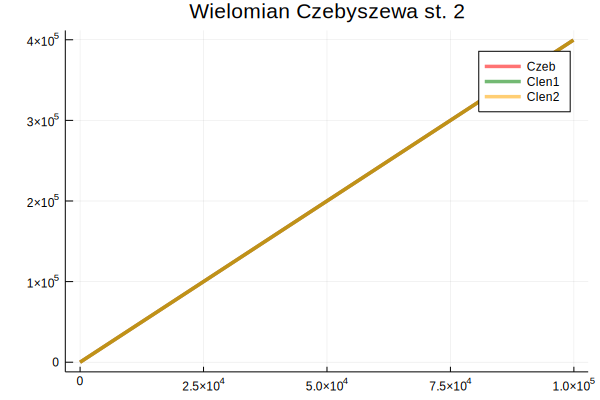

In [18]:
y = [yCzeb,yClen1, yClen2]
plot(ox,y,color = ["red" "green" "orange"],seriesalpha = 0.55, linewidth=3.5, title="Wielomian Czebyszewa st. 2", label=["Czeb" "Clen1" "Clen2"])

In [9]:
ox = []
yCzeb = []
yClen1 = []
yClen2 = []
w20 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
blad(20,w20)

Wyniki dla 20. wielomianu Czebyszwa:
x: 2 Czeb: 1.58631825968e+12
Clen1: 1.58631825968e+12 BladClen1: 0.0 BladWzgl: 0.0
Clen2: 1.58631825968e+12 BladClen2: 0.0 BladWzgl: 0.0
x: 102 Czeb: 1.52691663519261880092e+45
Clen1: 1.52691663519261880077e+45 BladClen1: -1.54742504910672534362e+26 BladWzgl: 1.01343125973050875142e-19
Clen2: 1.52691663519261880092e+45 BladClen2: 0.0 BladWzgl: 0.0
x: 202 Czeb: 6.64091676404337633894e+50
Clen1: 6.64091676404337629269e+50 BladClen1: -4.62438938963258085666e+33 BladWzgl: 6.96348042588171765828e-18
Clen2: 6.64091676404337629391e+50 BladClen2: -4.50269493201067083412e+33 BladWzgl: 6.78023094099009350948e-18
x: 302 Czeb: 1.38264408901219908693e+54
Clen1: 1.38264408901219908875e+54 BladClen1: 1.82768849420425932524e+36 BladWzgl: 1.32187922309783483672e-18
Clen2: 1.38264408901219908842e+54 BladClen2: 1.49538149525803035702e+36 BladWzgl: 1.08153754617095577553e-18
x: 402 Czeb: 3.16871243793242432679e+56
Clen1: 3.16871243793242433402e+56 BladClen1: 7.23100029

x: 4002 Czeb: 2.90980839798968971655e+75
Clen1: 2.90980839798968970263e+75 BladClen1: -1.39273194753891979448e+58 BladWzgl: 4.7863355831302217655e-18
Clen2: 2.90980839798968970224e+75 BladClen2: -1.43196383338508654925e+58 BladWzgl: 4.92116193758459420993e-18
x: 4102 Czeb: 4.65068860725401948645e+75
Clen1: 4.65068860725401944878e+75 BladClen1: -3.7662610412320084583e+58 BladWzgl: 8.09828685446171432208e-18
Clen2: 4.65068860725401944839e+75 BladClen2: -3.80549292707817521308e+58 BladWzgl: 8.18264400919569051272e-18
x: 4202 Czeb: 7.34961713560583166902e+75
Clen1: 7.3496171356058317161e+75 BladClen1: 4.70782630154001057288e+58 BladWzgl: 6.40553951951123329232e-18
Clen2: 7.34961713560583171767e+75 BladClen2: 4.86475384492467759197e+58 BladWzgl: 6.61905750349494106866e-18
x: 4302 Czeb: 1.14904628421038072893e+76
Clen1: 1.1490462842103807207e+76 BladClen1: -8.23869602769501850253e+58 BladWzgl: 7.17002973762420036658e-18
Clen2: 1.14904628421038072038e+76 BladClen2: -8.55255111446435254073e+58

Clen1: 1.1956480600635090834e+81 BladClen1: 3.70238525397271359485e+63 BladWzgl: 3.09655104845488938228e-18
Clen2: 1.1956480600635090834e+81 BladClen2: 3.70238525397271359485e+63 BladWzgl: 3.09655104845488938228e-18
x: 8002 Czeb: 1.51835133826265909715e+81
Clen1: 1.51835133826265909386e+81 BladClen1: -3.29100911464241208431e+63 BladWzgl: 2.16748853292945924425e-18
Clen2: 1.51835133826265909396e+81 BladClen2: -3.18816507980983670668e+63 BladWzgl: 2.09975451627541364281e-18
x: 8102 Czeb: 1.92243835067071142655e+81
Clen1: 1.92243835067071143354e+81 BladClen1: 6.99339436861512567916e+63 BladWzgl: 3.63777302204527377749e-18
Clen2: 1.92243835067071143354e+81 BladClen2: 6.99339436861512567916e+63 BladWzgl: 3.63777302204527377749e-18
x: 8202 Czeb: 2.42703152967017192512e+81
Clen1: 2.42703152967017191957e+81 BladClen1: -5.55357788095907039227e+63 BladWzgl: 2.28821826707533091586e-18
Clen2: 2.42703152967017191936e+81 BladClen2: -5.75926595062422114754e+63 BladWzgl: 2.37296709178182465363e-18
x: 

Clen2: 2.44206092724960114644e+84 BladClen2: -8.00373416681034618904e+66 BladWzgl: 3.27745064732051655481e-18
x: 11902 Czeb: 2.86667772693636872575e+84
Clen1: 2.86667772693636876135e+84 BladClen1: 3.55955545839723291039e+67 BladWzgl: 1.24170060169314731694e-17
Clen2: 2.86667772693636876177e+84 BladClen2: 3.60168037506465578507e+67 BladWzgl: 1.25639528336998929701e-17
x: 12002 Czeb: 3.36061472427105242645e+84
Clen1: 3.36061472427105240054e+84 BladClen1: -2.59068237504650679277e+67 BladWzgl: 7.70895383019084138474e-18
Clen2: 3.36061472427105240075e+84 BladClen2: -2.56961991671279535543e+67 BladWzgl: 7.64627940880717600773e-18
x: 12102 Czeb: 3.93446533499586939069e+84
Clen1: 3.93446533499586934225e+84 BladClen1: -4.8443654167536305881e+67 BladWzgl: 1.23126397217545099011e-17
Clen2: 3.93446533499586934267e+84 BladClen2: -4.80224050008620771343e+67 BladWzgl: 1.2205573289391427206e-17
x: 12202 Czeb: 4.60033324296245675872e+84
Clen1: 4.60033324296245682022e+84 BladClen1: 6.1502378334437397031

Clen2: 6.25358413545325455578e+86 BladClen2: -4.20575168007549980797e+69 BladWzgl: 6.72534595997830995859e-18
x: 15902 Czeb: 7.04990295637832459607e+86
Clen1: 7.04990295637832458044e+86 BladClen1: -1.56367690669473710809e+69 BladWzgl: 2.21801195898734618029e-18
Clen2: 7.04990295637832458044e+86 BladClen2: -1.56367690669473710809e+69 BladWzgl: 2.21801195898734618029e-18
x: 16002 Czeb: 7.94165398423579755769e+86
Clen1: 7.94165398423579757117e+86 BladClen1: 1.34799733335753198973e+69 BladWzgl: 1.69737605797647438377e-18
Clen2: 7.94165398423579757064e+86 BladClen2: 1.29407744002323071014e+69 BladWzgl: 1.62948101565741540842e-18
x: 16102 Czeb: 8.93956794472906409572e+86
Clen1: 8.93956794472906400567e+86 BladClen1: -9.00462218682831369142e+69 BladWzgl: 1.0072771125519110562e-17
Clen2: 8.93956794472906400352e+86 BladClen2: -9.22030176016551880978e+69 BladWzgl: 1.03140351045734605159e-17
x: 16202 Czeb: 1.00555038058893545843e+87
Clen1: 1.00555038058893545638e+87 BladClen1: -2.04895594670344862

Clen2: 1.9917404511196338193e+89 BladClen2: 2.04291691865000688108e+72 BladWzgl: 1.02569434561697274581e-17
x: 21502 Czeb: 2.17619697358954296266e+89
Clen1: 2.17619697358954293795e+89 BladClen1: -2.4708251921510218359e+72 BladWzgl: 1.13538674216401576262e-17
Clen2: 2.17619697358954293781e+89 BladClen2: -2.48462868484460296348e+72 BladWzgl: 1.14172968485766948197e-17
x: 21602 Czeb: 2.37675919189061676756e+89
Clen1: 2.37675919189061677018e+89 BladClen1: 2.62266361178041423923e+71 BladWzgl: 1.1034620674777701615e-18
Clen2: 2.37675919189061677059e+89 BladClen2: 3.03676839258784806647e+71 BladWzgl: 1.27769292023741808179e-18
x: 21702 Czeb: 2.59474887836226285952e+89
Clen1: 2.59474887836226283854e+89 BladClen1: -2.09813088942433139138e+72 BladWzgl: 8.08606531029167007171e-18
Clen2: 2.59474887836226283771e+89 BladClen2: -2.18095184558581815683e+72 BladWzgl: 8.40525209885581494306e-18
x: 21802 Czeb: 2.83158941384419914697e+89
Clen1: 2.83158941384419913151e+89 BladClen1: -1.54599118168108628839

Clen2: 5.16523675045434027044e+90 BladClen2: 4.0195770723708243498e+73 BladWzgl: 7.78198031681172731673e-18
x: 25502 Czeb: 5.56558086332102083045e+90
Clen1: 5.56558086332102080307e+90 BladClen1: -2.73861295040649571085e+73 BladWzgl: 4.92062377254248769666e-18
Clen2: 5.56558086332102080262e+90 BladClen2: -2.78278412702595531909e+73 BladWzgl: 4.99998867209962459482e-18
x: 25602 Czeb: 5.9952028459893605688e+90
Clen1: 5.9952028459893606514e+90 BladClen1: 8.2600100278389467408e+73 BladWzgl: 1.37776990037371046258e-17
Clen2: 5.99520284598936065229e+90 BladClen2: 8.34835238107786595728e+73 BladWzgl: 1.39250540732957902371e-17
x: 25702 Czeb: 6.45611676055170344056e+90
Clen1: 6.45611676055170347281e+90 BladClen1: 3.22449589322055140149e+73 BladWzgl: 4.99448199717039211545e-18
Clen2: 6.4561167605517034706e+90 BladClen2: 3.00364001012325336029e+73 BladWzgl: 4.65239418914502279267e-18
x: 25802 Czeb: 6.95046654698359124621e+90
Clen1: 6.95046654698359124312e+90 BladClen1: -3.09198236336217257677e+72

x: 29402 Czeb: 8.31305210799843359301e+91
Clen1: 8.31305210799843370538e+91 BladClen1: 1.12371473319905243361e+75 BladWzgl: 1.35174749129488335485e-17
Clen2: 8.31305210799843370679e+91 BladClen2: 1.13784950971727950825e+75 BladWzgl: 1.3687506043929322021e-17
x: 29502 Czeb: 8.86701873001966432214e+91
Clen1: 8.86701873001966441048e+91 BladClen1: 8.83423532389192164792e+74 BladWzgl: 9.96302770172712833492e-18
Clen2: 8.86701873001966441189e+91 BladClen2: 8.97558308907419239428e+74 BladWzgl: 1.01224361449547623877e-17
x: 29602 Czeb: 9.45583624506938450345e+91
Clen1: 9.45583624506938445257e+91 BladClen1: -5.0885195465617468692e+74 BladWzgl: 5.38135328772755054881e-18
Clen2: 9.45583624506938445257e+91 BladClen2: -5.0885195465617468692e+74 BladWzgl: 5.38135328772755054881e-18
x: 29702 Czeb: 1.00815681992078910282e+92
Clen1: 1.00815681992078911483e+92 BladClen1: 1.20145600404930134412e+75 BladWzgl: 1.19173523434945345231e-17
Clen2: 1.00815681992078911483e+92 BladClen2: 1.20145600404930134412e+7

Clen2: 8.86208527218718527337e+92 BladClen2: -1.13078212145816597093e+76 BladWzgl: 1.2759774779046851144e-17
x: 33402 Czeb: 9.3815991684371383313e+92
Clen1: 9.38159916843713840649e+92 BladClen1: 7.51970110769680370671e+75 BladWzgl: 8.01537240366824959485e-18
Clen2: 9.38159916843713840649e+92 BladClen2: 7.51970110769680370671e+75 BladWzgl: 8.01537240366824959485e-18
x: 33502 Czeb: 9.92987686502334232356e+92
Clen1: 9.9298768650233423654e+92 BladClen1: 4.18389384939521409245e+75 BladWzgl: 4.2134398102482199763e-18
Clen2: 9.92987686502334236653e+92 BladClen2: 4.29697206154103068955e+75 BladWzgl: 4.327316561876550246e-18
x: 33602 Czeb: 1.05084178560862126464e+93
Clen1: 1.05084178560862125785e+93 BladClen1: -6.7846927287489958256e+75 BladWzgl: 6.45643599413918583946e-18
Clen2: 1.05084178560862125785e+93 BladClen2: -6.7846927287489958256e+75 BladWzgl: 6.45643599413918583946e-18
x: 33702 Czeb: 1.11187949842867054645e+93
Clen1: 1.11187949842867054961e+93 BladClen1: 3.16618994008286471861e+75 Bl

Clen1: 7.64733559520176388783e+93 BladClen1: 1.04031955174151269326e+77 BladWzgl: 1.36036863923462401788e-17
Clen2: 7.64733559520176388602e+93 BladClen2: 1.02222703779818203772e+77 BladWzgl: 1.33671005420445664371e-17
x: 37402 Czeb: 8.04639972931097746746e+93
Clen1: 8.04639972931097746022e+93 BladClen1: -7.23700557733226221397e+75 BladWzgl: 8.99409154502938842629e-19
Clen2: 8.04639972931097745977e+93 BladClen2: -7.68931842591552860235e+75 BladWzgl: 9.55622226659372520247e-19
x: 37502 Czeb: 8.465138577294544943e+93
Clen1: 8.46513857729454492581e+93 BladClen1: -1.71878882461641227582e+76 BladWzgl: 2.03043199933737709449e-18
Clen2: 8.46513857729454492762e+93 BladClen2: -1.53786368518310572047e+76 BladWzgl: 1.81670231519660055833e-18
x: 37602 Czeb: 8.90446576432912479834e+93
Clen1: 8.90446576432912491866e+93 BladClen1: 1.20315217723148859307e+77 BladWzgl: 1.35117839640785659306e-17
Clen2: 8.90446576432912491685e+93 BladClen2: 1.18505966328815793754e+77 BladWzgl: 1.33085992428142265934e-17


Clen1: 4.20288484442735225804e+94 BladClen1: -8.68440669279871465677e+76 BladWzgl: 2.06629660679698558933e-18
Clen2: 4.20288484442735225804e+94 BladClen2: -8.68440669279871465677e+76 BladWzgl: 2.06629660679698558933e-18
x: 40902 Czeb: 4.40297536314928542811e+94
Clen1: 4.40297536314928536805e+94 BladClen1: -6.0067146291857776376e+77 BladWzgl: 1.36423989092898235721e-17
Clen2: 4.40297536314928536877e+94 BladClen2: -5.93434457341245501546e+77 BladWzgl: 1.34780326573706690715e-17
x: 41002 Czeb: 4.61206794621407845288e+94
Clen1: 4.61206794621407846084e+94 BladClen1: 7.96070613506548843537e+76 BladWzgl: 1.72606002944952627864e-18
Clen2: 4.61206794621407846193e+94 BladClen2: 9.04625697166532776747e+76 BladWzgl: 1.96143185164718895311e-18
x: 41102 Czeb: 4.83054414628599010445e+94
Clen1: 4.83054414628599006718e+94 BladClen1: -3.7270578723261150402e+77 BladWzgl: 7.71560668831005094823e-18
Clen2: 4.8305441462859900679e+94 BladClen2: -3.65468781655279241806e+77 BladWzgl: 7.56578908271179753172e-18

Clen1: 2.38128865248881034797e+95 BladClen1: 7.81596602351884319109e+77 BladWzgl: 3.28224216553921967864e-18
Clen2: 2.38128865248881034768e+95 BladClen2: 7.52648580042555270253e+77 BladWzgl: 3.16067764088961894986e-18
x: 44802 Czeb: 2.48456604005004050663e+95
Clen1: 2.48456604005004050301e+95 BladClen1: -3.61850278866613110699e+77 BladWzgl: 1.45639227548697095597e-18
Clen2: 2.48456604005004050301e+95 BladClen2: -3.61850278866613110699e+77 BladWzgl: 1.45639227548697095597e-18
x: 44902 Czeb: 2.59207723298319433918e+95
Clen1: 2.59207723298319433339e+95 BladClen1: -5.78960446186580977118e+77 BladWzgl: 2.23357714353388115704e-18
Clen2: 2.59207723298319433455e+95 BladClen2: -4.63168356949264781694e+77 BladWzgl: 1.78686171482710492555e-18
x: 45002 Czeb: 2.70398578059943261099e+95
Clen1: 2.70398578059943262199e+95 BladClen1: 1.10002484775450385652e+78 BladWzgl: 4.06816062291069090638e-18
Clen2: 2.70398578059943262228e+95 BladClen2: 1.12897287006383290538e+78 BladWzgl: 4.17521748140834066733e-1

Clen1: 1.21335823808330980691e+96 BladClen1: -5.55802028339117738033e+78 BladWzgl: 4.58069192505829493957e-18
Clen2: 1.21335823808330980714e+96 BladClen2: -5.32643610491654498948e+78 BladWzgl: 4.38982976151419931713e-18
x: 48802 Czeb: 1.26157973351790572986e+96
Clen1: 1.26157973351790571944e+96 BladClen1: -1.04212880313584575881e+79 BladWzgl: 8.26050685064413107452e-18
Clen2: 1.26157973351790571886e+96 BladClen2: -1.10002484775450385652e+79 BladWzgl: 8.71942389790213835585e-18
x: 48902 Czeb: 1.31161301495882817356e+96
Clen1: 1.31161301495882817541e+96 BladClen1: 1.85267342779705912678e+78 BladWzgl: 1.41251528207442723559e-18
Clen2: 1.31161301495882817518e+96 BladClen2: 1.62108924932242673593e+78 BladWzgl: 1.23595087181512383111e-18
x: 49002 Czeb: 1.3635222398580157705e+96
Clen1: 1.36352223985801576969e+96 BladClen1: -8.10544624661213367965e+77 BladWzgl: 5.94449141325055153698e-19
Clen2: 1.36352223985801576969e+96 BladClen2: -8.10544624661213367965e+77 BladWzgl: 5.94449141325055153698e-

Clen2: 5.24375985522329011524e+96 BladClen2: 8.80019878203603085219e+78 BladWzgl: 1.67822307371116258787e-18
x: 52702 Czeb: 5.43644187697614935811e+96
Clen1: 5.43644187697614941693e+96 BladClen1: 5.88223813325566272752e+79 BladWzgl: 1.08200147566508585282e-17
Clen2: 5.43644187697614941693e+96 BladClen2: 5.88223813325566272752e+79 BladWzgl: 1.08200147566508585282e-17
x: 52802 Czeb: 5.63581845973395477629e+96
Clen1: 5.63581845973395474989e+96 BladClen1: -2.64005963461080925566e+79 BladWzgl: 4.68442987202862505799e-18
Clen2: 5.63581845973395474943e+96 BladClen2: -2.68637647030573573383e+79 BladWzgl: 4.7666128522396535677e-18
x: 52902 Czeb: 5.84210885603794495065e+96
Clen1: 5.84210885603794499882e+96 BladClen1: 4.81695091227235372962e+79 BladWzgl: 8.24522622048360418173e-18
Clen2: 5.84210885603794499882e+96 BladClen2: 4.81695091227235372962e+79 BladWzgl: 8.24522622048360418173e-18
x: 53002 Czeb: 6.05553906378780435806e+96
Clen1: 6.05553906378780438169e+96 BladClen1: 2.36215862044125038664e

Clen1: 1.66617066624567837759e+97 BladClen1: -1.29687139945794138874e+79 BladWzgl: 7.78354478164073332915e-19
Clen2: 1.66617066624567837778e+97 BladClen2: -1.11160405667823547607e+79 BladWzgl: 6.67160981283491428193e-19
x: 56002 Czeb: 1.72372158619818182191e+97
Clen1: 1.72372158619818183006e+97 BladClen1: 8.15176308230706015782e+79 BladWzgl: 4.7291645864263288884e-18
Clen2: 1.72372158619818183024e+97 BladClen2: 8.3370304250867660705e+79 BladWzgl: 4.83664559975419999986e-18
x: 56102 Czeb: 1.7831523316642674745e+97
Clen1: 1.78315233166426748914e+97 BladClen1: 1.46361200795967671015e+80 BladWzgl: 8.20800321974536763874e-18
Clen2: 1.78315233166426748933e+97 BladClen2: 1.48213874223764730142e+80 BladWzgl: 8.31190199467885330564e-18
x: 56202 Czeb: 1.84452078873479344743e+97
Clen1: 1.84452078873479345836e+97 BladClen1: 1.0930773224002648848e+80 BladWzgl: 5.92607754315437181213e-18
Clen2: 1.84452078873479345817e+97 BladClen2: 1.07455058812229429353e+80 BladWzgl: 5.82563555089751805246e-18
x: 5

Clen2: 6.00065111331981726602e+97 BladClen2: 1.037497119566353111e+80 BladWzgl: 1.72897423958441946391e-18
x: 59902 Czeb: 6.19419746163118982603e+97
Clen1: 6.19419746163118980305e+97 BladClen1: -2.2973150504683533172e+80 BladWzgl: 3.70881791337561704498e-18
Clen2: 6.19419746163118980491e+97 BladClen2: -2.11204770768864740453e+80 BladWzgl: 3.40971969455500276711e-18
x: 60002 Czeb: 6.39364794033296979052e+97
Clen1: 6.39364794033296977088e+97 BladClen1: -1.96383383346488267438e+80 BladWzgl: 3.07153889577881529099e-18
Clen2: 6.39364794033296977236e+97 BladClen2: -1.81561995924111794424e+80 BladWzgl: 2.83972463949362168417e-18
x: 60102 Czeb: 6.59917236206014473945e+97
Clen1: 6.59917236206014475798e+97 BladClen1: 1.85267342779705912678e+80 BladWzgl: 2.80743300242984908735e-18
Clen2: 6.59917236206014475798e+97 BladClen2: 1.85267342779705912678e+80 BladWzgl: 2.80743300242984908735e-18
x: 60202 Czeb: 6.81094512850036965463e+97
Clen1: 6.81094512850036956348e+97 BladClen1: -9.11515326476153090374

Clen1: 2.05329559355373570631e+98 BladClen1: 1.33392486801388257128e+81 BladWzgl: 6.49650674847646158979e-18
Clen2: 2.05329559355373570571e+98 BladClen2: 1.27463931832437667922e+81 BladWzgl: 6.2077731152108410747e-18
x: 63902 Czeb: 2.11531222666059797741e+98
Clen1: 2.11531222666059797933e+98 BladClen1: 1.92678036490894149185e+80 BladWzgl: 9.10872797228006360665e-19
Clen2: 2.11531222666059797963e+98 BladClen2: 2.22320811335647095213e+80 BladWzgl: 1.05100707372462272381e-18
x: 64002 Czeb: 2.17910058263561272803e+98
Clen1: 2.17910058263561274285e+98 BladClen1: 1.48213874223764730142e+81 BladWzgl: 6.80160775527399889145e-18
Clen2: 2.17910058263561274271e+98 BladClen2: 1.46731735481527082841e+81 BladWzgl: 6.73359167772125890262e-18
x: 64102 Czeb: 2.24470838944087201825e+98
Clen1: 2.24470838944087201795e+98 BladClen1: -2.96427748447529460284e+79 BladWzgl: 1.32056239394804328629e-19
Clen2: 2.24470838944087201825e+98 BladClen2: 0.0 BladWzgl: 0.0
x: 64202 Czeb: 2.31218458322840009667e+98
Clen1:

Clen2: 6.33911139724702503162e+98 BladClen2: -2.84570638509628281873e+81 BladWzgl: 4.48912506306818917664e-18
x: 67802 Czeb: 6.51939811579392509402e+98
Clen1: 6.51939811579392507386e+98 BladClen1: -2.01570868944320032993e+81 BladWzgl: 3.0918631653433386841e-18
Clen2: 6.51939811579392507327e+98 BladClen2: -2.07499423913270622199e+81 BladWzgl: 3.18280031726520158658e-18
x: 67902 Czeb: 6.70453515010184500557e+98
Clen1: 6.7045351501018450447e+98 BladClen1: 3.91284627950738887575e+81 BladWzgl: 5.83611867475696793351e-18
Clen2: 6.7045351501018450441e+98 BladClen2: 3.8535607298178829837e+81 BladWzgl: 5.74769263423034720753e-18
x: 68002 Czeb: 6.89464555699257743193e+98
Clen1: 6.89464555699257741356e+98 BladClen1: -1.83785204037468265376e+81 BladWzgl: 2.66562222116077551688e-18
Clen2: 6.89464555699257741237e+98 BladClen2: -1.95642313975369443788e+81 BladWzgl: 2.83759784833243845344e-18
x: 68102 Czeb: 7.08985532733030643231e+98
Clen1: 7.08985532733030646729e+98 BladClen1: 3.49784743168084763136e

Clen1: 1.88666171830137874361e+99 BladClen1: 8.6556902546678602403e+81 BladWzgl: 4.58783372276236789405e-18
Clen2: 1.88666171830137874349e+99 BladClen2: 8.53711915528884845619e+81 BladWzgl: 4.52498668546425326522e-18
x: 71802 Czeb: 1.93728805082599622966e+99
Clen1: 1.93728805082599620559e+99 BladClen1: -2.40699331739393921751e+82 BladWzgl: 1.24245504759484581174e-17
Clen2: 1.93728805082599620583e+99 BladClen2: -2.38327909751813686069e+82 BladWzgl: 1.23021411116533994168e-17
x: 71902 Czeb: 1.9891995703301459596e+99
Clen1: 1.98919957033014594193e+99 BladClen1: -1.76670938074727558329e+82 BladWzgl: 8.88150896017967746445e-18
Clen2: 1.98919957033014594181e+99 BladClen2: -1.77856649068517676171e+82 BladWzgl: 8.94111640286544711158e-18
x: 72002 Czeb: 2.0424270464213142537e+99
Clen1: 2.04242704642131426011e+99 BladClen1: 6.40283936646663634214e+81 BladWzgl: 3.13491704767889717109e-18
Clen2: 2.04242704642131425963e+99 BladClen2: 5.92855496895058920569e+81 BladWzgl: 2.9027009700730529363e-18
x:

Clen2: 5.16098171908605094793e+99 BladClen2: 2.18170822857381682769e+82 BladWzgl: 4.22731245201963563195e-18
x: 75702 Czeb: 5.29224118683279917405e+99
Clen1: 5.29224118683279917263e+99 BladClen1: -1.42285319254814140936e+81 BladWzgl: 2.68856452742219745373e-19
Clen2: 5.29224118683279917215e+99 BladClen2: -1.89713759006418854582e+81 BladWzgl: 3.58475270322959660505e-19
x: 75802 Czeb: 5.42665906238927364404e+99
Clen1: 5.42665906238927366349e+99 BladClen1: 1.94456602981579325947e+82 BladWzgl: 3.58335765608173486216e-18
Clen2: 5.42665906238927366349e+99 BladClen2: 1.94456602981579325947e+82 BladWzgl: 3.58335765608173486216e-18
x: 75902 Czeb: 5.56430702663108350706e+99
Clen1: 5.56430702663108344398e+99 BladClen1: -6.30798248696342691485e+82 BladWzgl: 1.13365104707074415779e-17
Clen2: 5.5643070266310834435e+99 BladClen2: -6.3554109267150316285e+82 BladWzgl: 1.14217473915398283566e-17
x: 76002 Czeb: 5.70525828951783568862e+99
Clen1: 5.70525828951783569383e+99 BladClen1: 5.217128372676518501e+

Clen2: 1.31038014866549171519e+100 BladClen2: 5.50169901118614678288e+82 BladWzgl: 4.19855186053386801371e-18
x: 79502 Czeb: 1.34209402266215041894e+100
Clen1: 1.34209402266215042824e+100 BladClen1: 9.29597419131452387452e+82 BladWzgl: 6.92647015361503395528e-18
Clen2: 1.34209402266215042824e+100 BladClen2: 9.29597419131452387452e+82 BladWzgl: 6.92647015361503395528e-18
x: 79602 Czeb: 1.37453411717588488078e+100
Clen1: 1.3745341171758848786e+100 BladClen1: -2.18170822857381682769e+82 BladWzgl: 1.58723468651061954257e-18
Clen2: 1.37453411717588487878e+100 BladClen2: -1.99199446956739797311e+82 BladWzgl: 1.44921427898795697371e-18
x: 79702 Czeb: 1.40771611824133813083e+100
Clen1: 1.40771611824133811414e+100 BladClen1: -1.66948107925648592032e+83 BladWzgl: 1.18595010572314192867e-17
Clen2: 1.40771611824133811414e+100 BladClen2: -1.66948107925648592032e+83 BladWzgl: 1.18595010572314192867e-17
x: 79802 Czeb: 1.44165603037054240336e+100
Clen1: 1.44165603037054239273e+100 BladClen1: -1.062397

Clen1: 3.25876508744379210587e+100 BladClen1: 1.93508034186547231674e+83 BladWzgl: 5.93807865845085716949e-18
Clen2: 3.25876508744379210644e+100 BladClen2: 1.99199446956739797311e+83 BladWzgl: 6.11272803075823532171e-18
x: 83402 Czeb: 3.33390140984739719693e+100
Clen1: 3.33390140984739723753e+100 BladClen1: 4.05987444273736348805e+83 BladWzgl: 1.21775479945077208625e-17
Clen2: 3.3339014098473972379e+100 BladClen2: 4.09781719453864725897e+83 BladWzgl: 1.2291356854269475263e-17
x: 83502 Czeb: 3.41067696295562703013e+100
Clen1: 3.41067696295562704682e+100 BladClen1: 1.66948107925648592032e+83 BladWzgl: 4.89486719906110879549e-18
Clen2: 3.41067696295562704682e+100 BladClen2: 1.66948107925648592032e+83 BladWzgl: 4.89486719906110879549e-18
x: 83602 Czeb: 3.48912548184027675487e+100
Clen1: 3.48912548184027677081e+100 BladClen1: 1.59359557565391837849e+83 BladWzgl: 4.56732090590621271959e-18
Clen2: 3.489125481840276771e+100 BladClen2: 1.61256695155456026395e+83 BladWzgl: 4.62169377383366763293

Clen2: 7.77324545043481720737e+100 BladClen2: -1.74536658285905346215e+83 BladWzgl: 2.24535117794514223832e-18
x: 87302 Czeb: 7.94437216793290802967e+100
Clen1: 7.94437216793290801905e+100 BladClen1: -1.06239705043594558566e+83 BladWzgl: 1.33729516691609979773e-18
Clen2: 7.94437216793290801981e+100 BladClen2: -9.86511546833378043826e+82 BladWzgl: 1.24177408356494981218e-18
x: 87402 Czeb: 8.11906380894982345638e+100
Clen1: 8.1190638089498234579e+100 BladClen1: 1.51771007205135083666e+82 BladWzgl: 1.86931659581040056001e-19
Clen2: 8.11906380894982345638e+100 BladClen2: 0.0 BladWzgl: 0.0
x: 87502 Czeb: 8.29739043147396332625e+100
Clen1: 8.29739043147396335888e+100 BladClen1: 3.26307665491040429881e+83 BladWzgl: 3.93265410596177707654e-18
Clen2: 8.29739043147396335888e+100 BladClen2: 3.26307665491040429881e+83 BladWzgl: 3.93265410596177707654e-18
x: 87602 Czeb: 8.47942338779500617275e+100
Clen1: 8.47942338779500620007e+100 BladClen1: 2.73187812969243150598e+83 BladWzgl: 3.22177346825799975

Clen2: 1.78496715129411267372e+101 BladClen2: 8.95448942510296993627e+83 BladWzgl: 5.01661300523704736634e-18
x: 91202 Czeb: 1.82256403217773152954e+101
Clen1: 1.82256403217773153682e+101 BladClen1: 7.28500834584648401595e+83 BladWzgl: 3.9971206592625600807e-18
Clen2: 1.82256403217773153728e+101 BladClen2: 7.74032136746188926694e+83 BladWzgl: 4.24694070046647008584e-18
x: 91302 Czeb: 1.86091031016765002921e+101
Clen1: 1.86091031016765003786e+101 BladClen1: 8.65094741069269976894e+83 BladWzgl: 4.64877182066519532449e-18
Clen2: 1.86091031016765003832e+101 BladClen2: 9.10626043230810501993e+83 BladWzgl: 4.89344402175283718363e-18
x: 91402 Czeb: 1.90002007714126353333e+101
Clen1: 1.90002007714126351618e+101 BladClen1: -1.71501238141802644542e+84 BladWzgl: 9.02628557482615456648e-18
Clen2: 1.90002007714126351648e+101 BladClen2: -1.68465817997699942869e+84 BladWzgl: 8.86652830801507218443e-18
x: 91502 Czeb: 1.93990767410108823323e+101
Clen1: 1.9399076741010882346e+101 BladClen1: 1.3659390648

Clen2: 3.95842234499405777413e+101 BladClen2: 1.33558486340518873626e+84 BladWzgl: 3.37403325618907314336e-18
x: 95102 Czeb: 4.03834360291311646229e+101
Clen1: 4.03834360291311648566e+101 BladClen1: 2.33727351095908028845e+84 BladWzgl: 5.78770342690269068555e-18
Clen2: 4.03834360291311648505e+101 BladClen2: 2.27656510807702625498e+84 BladWzgl: 5.6373734677623610573e-18
x: 95202 Czeb: 4.1197919379084517906e+101
Clen1: 4.11979193790845177998e+101 BladClen1: -1.06239705043594558566e+84 BladWzgl: 2.57876384644634863822e-18
Clen2: 4.11979193790845178059e+101 BladClen2: -1.00168864755389155219e+84 BladWzgl: 2.43140591236370014454e-18
x: 95302 Czeb: 4.20279487806941503434e+101
Clen1: 4.20279487806941507684e+101 BladClen1: 4.24958820174378234264e+84 BladWzgl: 1.01113385854697295342e-17
Clen2: 4.20279487806941507653e+101 BladClen2: 4.2192340003027553259e+84 BladWzgl: 1.0039114738430660038e-17
x: 95402 Czeb: 4.28738041804028038615e+101
Clen1: 4.28738041804028039586e+101 BladClen1: 9.713344461128

Clen2: 8.50151487789826000547e+101 BladClen2: 6.49579910837978158089e+84 BladWzgl: 7.64075485566364101579e-18
x: 99002 Czeb: 8.66633170392866888118e+101
Clen1: 8.66633170392866883626e+101 BladClen1: -4.4924218132719984765e+84 BladWzgl: 5.18376398082647731179e-18
Clen2: 8.66633170392866883687e+101 BladClen2: -4.43171341038994444304e+84 BladWzgl: 5.11371311622071410488e-18
x: 99102 Czeb: 8.83417254203347058792e+101
Clen1: 8.83417254203347054968e+101 BladClen1: -3.82462938156940410837e+84 BladWzgl: 4.32935780161821690306e-18
Clen2: 8.83417254203347054907e+101 BladClen2: -3.88533778445145814184e+84 BladWzgl: 4.39807776672326796513e-18
x: 99202 Czeb: 9.00508974022591347178e+101
Clen1: 9.00508974022591340925e+101 BladClen1: -6.25296549685156544702e+84 BladWzgl: 6.94381252961805061067e-18
Clen2: 9.00508974022591341047e+101 BladClen2: -6.13154869108745738009e+84 BladWzgl: 6.8089812183633311815e-18
x: 99302 Czeb: 9.17913649853316078598e+101
Clen1: 9.1791364985331607878e+101 BladClen1: 1.8212520

In [ ]:
y = [yCzeb,yClen1, yClen2]
plot(ox,y,color = ["red" "green" "orange"],seriesalpha = 0.55, linewidth=3.5, title="Wielomian Czebyszewa st. 20", label=["Czeb" "Clen1" "Clen2"])

In [ ]:
ox = []
yCzeb = []
yClen1 = []
yClen2 = []
w39 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
blad(39,w39)

In [ ]:
start = 0.95
iter = -0.001
finish = -0.95
y = [yCzeb,yClen1, yClen2]
plot(ox,y,color = ["red" "green" "orange"],seriesalpha = 0.55, linewidth=3.5, title="Wielomian Czebyszewa st. 39", label=["Czeb" "Clen1" "Clen2"])

In [ ]:
ox = []
yCzeb = []
yClen1 = []
yClen2 = []
w2 = [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
blad(2,w2)

In [1]:
y = [yCzeb,yClen1, yClen2]
plot(ox,y,color = ["red" "green" "orange"],seriesalpha = 0.55, linewidth=3.5, title="Wielomian Czebyszewa st. 2", label=["Czeb" "Clen1" "Clen2"])

UndefVarError: UndefVarError: yCzeb not defined

In [ ]:
ox = []
yCzeb = []
yClen1 = []
yClen2 = []
w20 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
blad(20,w20)

In [ ]:
y = [yCzeb,yClen1, yClen2]
plot(ox,y,color = ["red" "green" "orange"],seriesalpha = 0.55, linewidth=3.5, title="Wielomian Czebyszewa st. 20", label=["Czeb" "Clen1" "Clen2"])

In [ ]:
ox = []
yCzeb = []
yClen1 = []
yClen2 = []
w39 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
blad(39,w39)

In [ ]:
start = -2
iter = -100
finish = -100000
y = [yCzeb,yClen1, yClen2]
plot(ox,y,color = ["red" "green" "orange"],seriesalpha = 0.55, linewidth=3.5, title="Wielomian Czebyszewa st. 39", label=["Czeb" "Clen1" "Clen2"])

In [ ]:
ox = []
yCzeb = []
yClen1 = []
yClen2 = []
w2 = [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
blad(2,w2)

In [ ]:
y = [yCzeb,yClen1, yClen2]
plot(ox,y,color = ["red" "green" "orange"],seriesalpha = 0.55, linewidth=3.5, title="Wielomian Czebyszewa st. 2", label=["Czeb" "Clen1" "Clen2"])

In [ ]:
ox = []
yCzeb = []
yClen1 = []
yClen2 = []
w20 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
blad(20,w20)

In [ ]:
y = [yCzeb,yClen1, yClen2]
plot(ox,y,color = ["red" "green" "orange"],seriesalpha = 0.55, linewidth=3.5, title="Wielomian Czebyszewa st. 20", label=["Czeb" "Clen1" "Clen2"])

In [ ]:
ox = []
yCzeb = []
yClen1 = []
yClen2 = []
w39 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
blad(39,w39)

In [ ]:
y = [yCzeb,yClen1, yClen2]
plot(ox,y,color = ["red" "green" "orange"],seriesalpha = 0.55, linewidth=3.5, title="Wielomian Czebyszewa st. 39", label=["Czeb" "Clen1" "Clen2"])

## Dowolny wielomian
Obliczanie pochodnej dla wielomianu: 
$$W(x) = x^5 + 4x^4 + - x^3 - 3/2$$
jest on kombinacją liniową wielomianów Czebyszewa:
$$W(x) = \frac{T_5}{16} + \frac{T_4}{2} + \frac{T_3}{16} + T_2 - \frac{T_1}{8}$$
wzór na jego pochodną to:
$$W'(x) = 5x^4 + 16x^3 - 3x^2$$
która będzie obliczana przez funkcję wiel(x).

In [ ]:
function wiel(x)
    return ((BigFloat(x) * BigFloat(5) + BigFloat(16)) * BigFloat(x) - BigFloat(3)) * BigFloat(x) * BigFloat(x)
end

Funckja bla2d porównuje wyniki dla liczenia pochodnej powyższego wielomianu za pomocą funkcji Clen1, Clen2 oraz wiel, gdzie wiel będzie punktem odniesienia. 
Funkcja dodaje odpowiednio do list ox, yWiel, yClen1, yClen2 punkt na osi x, wartość funkcji wiel w punkcie x, wartość funkcji Clen1 w punkcie x, wartość funkcji Clen2 w punkcie x.

In [ ]:
ww = [0,1/8,1,1/16,1/2,1/16]
start = -100050
iter = 100
finish = 100050
ox = []
yWiel = []
yClen1 = []
yClen2 = []
function blad2(w)
    licz = 0
    sum1 = 0
    sum2 = 0
    print("Wyniki dla pochodnej wielomianu:")
    for i in start:iter:finish
        wynclen1 = Clen1(a,b,c,w,i)
        wynclen2 = Clen2(a,b,c,w,i)
        wyn = wiel(i)
        push!(ox,i)
        push!(yWiel,wyn)
        push!(yClen1,wynclen1)
        push!(yClen2,wynclen2)
        print("x: ")
        print(i)
        print(" wiel:")
        println(wyn)
        print("Clen1: ")
        print(wynclen1)
        print(" BladClen1: ")
        print(wynclen1 - wyn)
        if(wyn != 0)
            licz += 1
            sum1 += abs((wynclen1 - wyn)/wyn)
            print(" BladWzgl: ")
            print(abs((wynclen1 - wyn)/wyn))
        end
        println()
        print("Clen2: ")
        print(wynclen2)
        print(" BladClen2: ")
        print(wynclen2 - wyn)
        if(wyn != 0)
            sum2 += abs((wynclen2 - wyn)/wyn)
            print(" BladWzgl: ")
            print(abs((wynclen2 - wyn)/wyn))
        end
        println()
    end
    print("Sredni błąd względny dla Clen1 wynosił: ")
    println(sum1/licz)
    print("Sredni błąd względny dla Clen2 wynosił: ")
    print(sum2/licz)
end

In [ ]:
blad2(ww)

In [ ]:
y = [yWiel,yClen1, yClen2]
plot(ox,y,color = ["red" "green" "orange"],seriesalpha = 0.55, linewidth=3.5, title="Wielomian", label=["Czeb" "Clen1" "Clen2"])

In [ ]:
start = -1
iter = 0.001
finish = 1
ox = []
yWiel = []
yClen1 = []
yClen2 = []
blad2(ww)

In [ ]:
y = [yWiel,yClen1, yClen2]
plot(ox,y,color = ["red" "green" "orange"],seriesalpha = 0.55, linewidth=3.5, title="Wielomian", label=["Czeb" "Clen1" "Clen2"])